##From [2013-12-03-Crank_Nicolson](http://nbviewer.ipython.org/github/waltherg/notebooks/blob/master/2013-12-03-Crank_Nicolson.ipynb)

# The Crank-Nicolson Method

The [Crank-Nicolson method](http://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) is a well-known finite difference method for the
numerical integration of the heat equation and closely related partial differential equations.

We often resort to a Crank-Nicolson (CN) scheme when we integrate numerically reaction-diffusion systems in one space dimension

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + f(u),$$

$$\frac{\partial u}{\partial x}\Bigg|_{x = 0, L} = 0,$$

where $u$ is our concentration variable, $x$ is the space variable, $D$ is the diffusion coefficient of $u$, $f$ is the reaction term,
and $L$ is the length of our one-dimensional space domain.

Note that we use [Neumann boundary conditions](http://en.wikipedia.org/wiki/Neumann_boundary_condition) and specify that the solution
$u$ has zero space slope at the boundaries, effectively prohibiting entrance or exit of material at the boundaries (no-flux boundary conditions).

## Finite Difference Methods

Many fantastic textbooks and tutorials have been written about finite difference methods, for instance a free textbook by
[Lloyd Trefethen](http://people.maths.ox.ac.uk/trefethen/pdetext.html).

Here we describe a few basic aspects of finite difference methods.

The above reaction-diffusion equation describes the time evolution of variable $u(x,t)$ in one space dimension ($u$ is a line concentration).
If we knew an analytic expression for $u(x,t)$ then we could plot $u$ in a two-dimensional coordinate system with axes $t$ and $x$.

To approximate $u(x,t)$ numerically we discretize this two-dimensional coordinate system resulting, in the simplest case, in a
two-dimensional [regular grid](http://en.wikipedia.org/wiki/Regular_grid).
This picture is employed commonly when constructing finite differences methods, see for instance 
[Figure 3.2.1 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf).

Let us discretize both time and space as follows:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

where $N$ and $J$ are the number of discrete time and space points in our grid respectively.
$\Delta t$ and $\Delta x$ are the time step and space step respectively and defined as follows:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

where $T$ is the point in time up to which we will integrate $u$ numerically.

Our ultimate goal is to construct a numerical method that allows us to approximate the unknonwn analytic solution $u(x,t)$
reasonably well in these discrete grid points.

That is we want construct a method that computes values $U(j \Delta x, n \Delta t)$ (note: capital $U$) so that

$$U(j \Delta x, n \Delta t) \approx u(j \Delta x, n \Delta t)$$

As a shorthand we will write $U_j^n = U(j \Delta x, n \Delta t)$ and $(j,n)$ to refer to grid point $(j \Delta x, n \Delta t)$.

## The Crank-Nicolson Stencil

$$\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{U_j^{n+1} - U_j^n}{\Delta t}.$$

Based on the two-dimensional grid we construct we then approximate the operators of our reaction-diffusion system.

For instance, to approximate the time derivative on the left-hand side in grid point $(j,n)$ we use the values of $U$ in two specific grid points:

$$\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{U_j^{n+1} - U_j^n}{\Delta t}.$$

We can think of this scheme as a stencil that we superimpose on our $(x,t)$-grid and this particular stencil is
commonly referred to as [forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences).

The spatial part of the [Crank-Nicolson stencil](http://journals.cambridge.org/abstract_S0305004100023197)
(or see [Table 3.2.2 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf))
for the heat equation ($u_t = u_{xx}$) approximates the 
[Laplace operator](http://en.wikipedia.org/wiki/Laplace_operator) of our equation and takes the following form

$$\frac{\partial^2 u}{\partial x^2}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{1}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right).$$

To approximate $f(u(j \Delta x, n \Delta t))$ we write simply $f(U_j^n)$.

These approximations define the stencil for our numerical method as pictured on [Wikipedia](http://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method).

![SVG](https://dl.dropboxusercontent.com/u/129945779/georgio/CN-stencil.svg)

Applying this stencil to grid point $(j,n)$ gives us the following approximation of our reaction-diffusion equation:

$$\frac{U_j^{n+1} - U_j^n}{\Delta t} = \frac{D}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right) + f(U_j^n).$$

In my case:
$$\frac{U_j^{n+1} - U_j^n}{\Delta t} = \frac{D}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right).$$

 

## Reordering Stencil into Linear System

<font color = 'green'>
They:
$$ \frac{\partial U}{\partial t}\Bigg|_{x=0,L} = 0$$
</font>

<font color = 'red'> In my case: 
Краевая задача третьего типа по Цветкову:
$$ -D \frac{\partial n}{\partial x}\Bigg|_{x=0} = f_1(n(0,t), t) $$
Где $f_1(n(0,t),t) = \Gamma_{inc} - k_u u^2(0,t)$


Upstream membrane surface (in the QUEST)
$$
\Gamma_{inc} = k_uu^2(0,t) - D \frac{\partial u(x,t)}{\partial x}|_{x=0}
$$
Downstream membrane surface (to QMS)
$$
0 = k_d u^2(L,t) + D \frac{\partial u(x,t)}{\partial x}|_{x=L}
$$
j - space n - time

$$ \Gamma_{inc}^n - k_u U_0^{n2} + D\frac{U_1^n - U_0^n}{\Delta x} = 0,
$$

$$
k_d U_J^{n2} + D\frac{U_J^n - U_{J-1}^n}{\Delta x} = 0
$$

</font>

<font color = 'green'> 
$$
U_0^{n+1} = -\frac{D}{2k_u\Delta x} + \frac{1}{2} \sqrt{\Big(\frac{D}{k_u \Delta x}\Big)^2 + \frac{4DU_1^n}{k_u \Delta x} + \frac{4\Gamma_{inc}^n}{k_u}}
$$
$$
U_{J-1}^{n+1} = -\frac{D}{2k_d\Delta x} + \frac{1}{2} \sqrt{\Big(\frac{D}{k_d \Delta x}\Big)^2 + \frac{4DU_{J-2}^n}{k_d \Delta x}}
$$
</font>

Let us define $\sigma = \frac{D \Delta t}{2 \Delta x^2}$ and reorder the above approximation of our reaction-diffusion equation:

$$-\sigma U_{j-1}^{n+1} + (1+2\sigma) U_j^{n+1} -\sigma U_{j+1}^{n+1} = \sigma U_{j-1}^n + (1-2\sigma) U_j^n + \sigma U_{j+1}^n + \Delta t f(U_j^n).$$

<font color = 'blue'> This equation makes sense for space indices $j = 1,\ldots,J-2$ but it does not make sense for indices $j=0$ and $j=J-1$ (on the boundaries) </font>:

$$j=0:~-\sigma U_{-1}^{n+1} + (1+2\sigma) U_0^{n+1} -\sigma U_{1}^{n+1} = \sigma U_{-1}^n + (1-2\sigma) U_0^n + \sigma U_{1}^n + \Delta t f(U_0^n),$$

$$j=J-1:~-\sigma U_{J-2}^{n+1} + (1+2\sigma) U_{J-1}^{n+1} -\sigma U_{J}^{n+1} = \sigma U_{J-2}^n + (1-2\sigma) U_{J-1}^n + \sigma U_{J}^n + \Delta t f(U_{J-1}^n).$$

The problem here is that the values $U_{-1}^n$ and $U_J^n$ lie outside our grid.

However, we can work out what these values should equal by considering our Neumann boundary condition.
Let us discretize our boundary condition at $j=0$ with the 
[backward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences) and
at $j=J-1$ with the
[forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences):

$$\frac{U_1^n - U_0^n}{\Delta x} = 0,$$

$$\frac{U_J^n - U_{J-1}^n}{\Delta x} = 0.$$

These two equations make it clear that we need to amend our above numerical approximation for
$j=0$ with the identities $U_0^n = U_1^n$ and $U_0^{n+1} = U_1^{n+1}$, and
for $j=J-1$ with the identities $U_{J-1}^n = U_J^n$ and $U_{J-1}^{n+1} = U_J^{n+1}$.

Let us reinterpret our numerical approximation of the line concentration of $u$ in a fixed point in time as a vector $\mathbf{U}^n$:

$$\mathbf{U}^n = 
\begin{bmatrix} U_0^n \\ \vdots \\ U_{J-1}^n \end{bmatrix}.$$

Using this notation we can now write our above approximation for a fixed point in time, $t = n \Delta t$, compactly as a linear system:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\sigma & 1+2\sigma & -\sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\sigma & 1+2\sigma & -\sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+2\sigma & -\sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
U_0^{n+1} \\
U_1^{n+1} \\
U_2^{n+1} \\
\vdots \\
U_{J-2}^{n+1} \\
U_{J-1}^{n+1}
\end{bmatrix} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
\sigma & 1-2\sigma & \sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & \sigma & 1-2\sigma & \sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-2\sigma & \sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
U_0^{n} \\
U_1^{n} \\
U_2^{n} \\
\vdots \\
U_{J-2}^{n} \\
U_{J-1}^{n}
\end{bmatrix} +
\begin{bmatrix}
f(U_1^n) \\
0 \\
0 \\
\vdots \\
0 \\
g(U_{J-2}^n)
\end{bmatrix}.
$$

Note that since our numerical integration starts with a well-defined initial condition at $n=0$, $\mathbf{U}^0$, the
vector $\mathbf{U}^{n+1}$ on the left-hand side is the only unknown in this system of linear equations.

Thus, to integrate numerically our reaction-diffusion system from time point $n$ to $n+1$ we need to solve numerically for vector $\mathbf{U}^{n+1}$.

Let us call the matrix on the left-hand side $A$, the one on the right-hand side $B$,
and the vector on the right-hand side $\mathbf{f}^n$.
Using this notation we can write the above system as

$$A \mathbf{U}^{n+1} = B \mathbf{U}^n + f^n.$$

In this linear equation, matrices $A$ and $B$ are defined by our problem: we need to specify these matrices once for our
problem and incorporate our boundary conditions in them.
Vector $\mathbf{f}^n$ is a function of $\mathbf{U}^n$ and so needs to be reevaluated in every time point $n$.
We also need to carry out one matrix-vector multiplication every time point, $B \mathbf{U}^n$, and
one vector-vector addition, $B \mathbf{U}^n + f^n$.

The most expensive numerical operation is inversion of matrix $A$ to solve for $\mathbf{U}^{n+1}$, however we may
get away with doing this only once and store the inverse of $A$ as $A^{-1}$:

$$\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + f^n \right).$$

## A Crank-Nicolson Example in Python

Let us apply the CN method to a two-variable reaction-diffusion system that was introduced by 
[Mori *et al.*](http://www.sciencedirect.com/science/article/pii/S0006349508704442):

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} + f(u,v),$$

$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2} - f(u,v),$$

with Neumann boundary conditions

$$\frac{\partial u}{\partial x}\Bigg|_{x=0,L} = 0,$$

$$\frac{\partial v}{\partial x}\Bigg|_{x=0,L} = 0.$$

The variables of this system, $u$ and $v$, represent the concetrations of the active form and its inactive form respectively.
The reaction term $f(u,v)$ describes the interchange (activation and inactivation) between these two states of the protein.
A particular property of this system is that the inactive has much greater diffusivity that the active form, $D_v \gg D_u$.

Using the CN method to integrate this system numerically, we need to set up two separate approximations

$$A_u \mathbf{U}^{n+1} = B_u \mathbf{U}^n + \mathbf{f}^n,$$

$$A_v \mathbf{V}^{n+1} = B_v \mathbf{V}^n - \mathbf{f}^n,$$

with two different $\sigma$ terms, $\sigma_u = \frac{D_u \Delta t}{2 \Delta x^2}$ and $\sigma_v = \frac{D_v \Delta t}{2 \Delta x^2}$.

### Import Packages

For the matrix-vector multiplication, vector-vector addition, and matrix inversion that we will need to carry
out we will use the Python library [NumPy](http://www.numpy.org/).
To visualize our numerical solutions, we will use [pyplot](http://matplotlib.org/api/pyplot_api.html).

In [1]:
import numpy
%pylab inline
import matplotlib as mpl
mpl.rc("savefig", dpi=120)

Populating the interactive namespace from numpy and matplotlib


In [2]:
numpy.set_printoptions(precision=3)

### Specify System parameters

In [3]:
L = .1 # Material length
J = 100 # Number of coordinate grid points
dx = float(L)/float(J-1) # Grid parameter
x_grid = numpy.array([j*dx for j in range(J)]) # Grid

In [4]:
T = 1 # Time
N = 100 # Iterations
dt = float(T)/float(N-1) # Time step
t_grid = numpy.array([n*dt for n in range(N)]) # Time grid

In [5]:
D_u = 1e-3 # Diffusion coeffitient for U
sigma_u = float(D_u*dt)/float((2.*dx*dx))
print sigma_u

4.95


###Specify the initial Condition
Initial concentration profile.

In [6]:
U = np.array([0.1 for i in range(int(0.2*J))] + [1 for i in range(int(0.2*J),int(0.5*J))] + [0.1 for i in range(int(0.5*J),J)] )

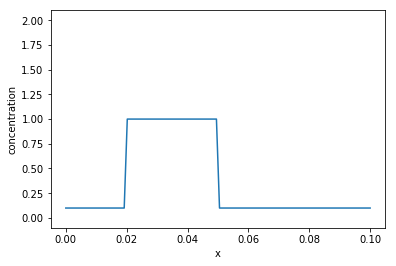

In [7]:
ylim((-0.1, 2.1))
xlabel('x'); ylabel('concentration')
plot(x_grid, U)
show()

In [8]:
def f_vec(U,ti):
    upstream =  -D_u/(2.*k_u*dx) + 0.5*sqrt((D_u/(k_u*dx))**2 + 4*D_u*U[1]/(k_u*dx) + 4*g_inc[ti-1]/k_u)
    downstream = -D_u/(2.*k_d*dx) + 0.5*sqrt((D_u/(k_d*dx))**2 + 4*D_u*U[-1]/(k_d*dx))
    return upstream, downstream

### Create Matrices

In [9]:
A_u = numpy.diagflat([-sigma_u for i in range(J-1)], -1) +\
      numpy.diagflat([1.+sigma_u]+[1.+2.*sigma_u for i in range(J-2)]+[1.+sigma_u]) +\
      numpy.diagflat([-sigma_u for i in range(J-1)], 1)
        
B_u = numpy.diagflat([sigma_u for i in range(J-1)], -1) +\
      numpy.diagflat([1.-sigma_u]+[1.-2.*sigma_u for i in range(J-2)]+[1.-sigma_u]) +\
      numpy.diagflat([sigma_u for i in range(J-1)], 1)

### Solve the System iteratively

In [10]:
U_record = []

U_record.append(U)

for ti in range(1,N):
    U_new = numpy.linalg.solve(A_u, B_u.dot(U))
    
    U = U_new
    
    U_record.append(U)

### Plot the Numerical Solution
Let us take a look at the numerical solution we attain after N time steps.

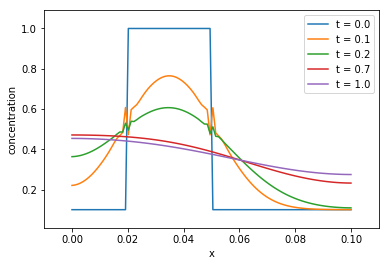

In [11]:
#ylim((-0.1, 2.1))
xlabel('x'); ylabel('concentration')
t1 = T*0.1; t2 = T*0.2; t3 = T*0.7
plot(x_grid, U_record[0],label = 't = %.1f'% t_grid[0])
plot(x_grid, U_record[int(t1/dt)],label = 't = %.1f'% t_grid[int(t1/dt)])
plot(x_grid, U_record[int(t2/dt)],label = 't = %.1f'% t_grid[int(t2/dt)])
plot(x_grid, U_record[int(t3/dt)],label = 't = %.1f'% t_grid[int(t3/dt)])
plot(x_grid, U,label = 't = %.1f'% t_grid[-1])
legend(framealpha = 0.8)
margins(0.1)
show()

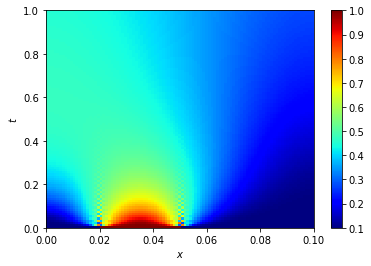

In [12]:
U_r = np.array(U_record)
p = pcolor(x_grid,t_grid, U_r, vmin=abs(U_r).min(),cmap = 'jet')
#vmax=.5
xlabel('$x$'); ylabel('$t$')
cb = colorbar(p)

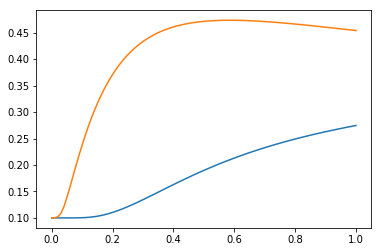

In [13]:
plot(t_grid,U_r[:,-1])
plot(t_grid,U_r[:,0])